In [65]:
#Básicos

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


#Visualización
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import missingno as msno

In [66]:
df = pd.read_csv("tested.csv",sep=",")

In [67]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
print("Titanic tamaño :" ,df.size)
print("Titanic talla :" ,df.shape)

Titanic tamaño : 5016
Titanic talla : (418, 12)


In [69]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [71]:
df.isnull().sum().sort_values(ascending= False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

<AxesSubplot:>

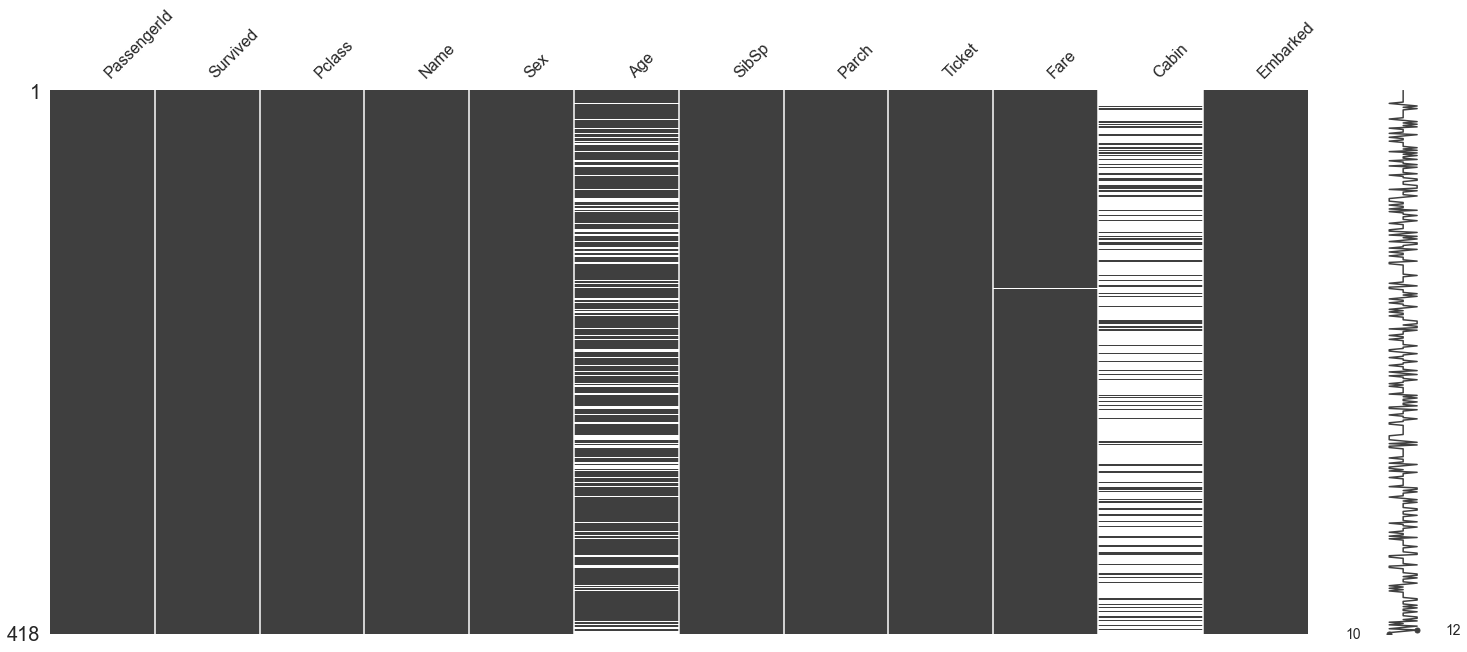

In [72]:

msno.matrix(df)

In [73]:
def isnull (df):
    numero = df.isnull().sum().sort_values(ascending=False)
    porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([numero, porcentaje], axis=1, keys=['numero', 'porcentaje'])
    return missing_values

In [74]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())
df['Cabin'] = df['Cabin'].fillna(method='backfill')

In [75]:
df['Cabin'] = df['Cabin'].fillna(method='backfill')
df['Cabin'] = df['Cabin'].fillna(df['Cabin'].mode()[0])

In [76]:
df['Age'] = df['Age'].astype(int)

In [77]:
bins = [0, 10, 18, 31, 51, 61, df["Age"].max()]
etiquetas = ["0-10", "11-18", "19-30", "31-50", "51-60", "60+"]
df["Age_Group"] = pd.cut(df["Age"], bins=bins, labels=etiquetas)
print(df[["Age", "Age_Group"]].head())

   Age Age_Group
0   34     31-50
1   47     31-50
2   62       60+
3   27     19-30
4   22     19-30


In [78]:
bins = [0, 10, 50, 100, 200, 300, 500, 700, 1000]


labels = ['hasta10', 'hasta50', 'hasta100', 'hasta200', 'hasta300', 'hasta500', 'hasta700', 'hasta1000']

df['Fare_Category'] = pd.cut(df['Fare'], bins=bins, labels=labels)




In [79]:
df['cabin_groups'] = df.groupby(df['Cabin'].str[0])['Cabin'].count()


In [80]:

df['Cabin_Letter'] = df['Cabin'].str[0]



In [82]:
df["Survived"] = np.random.choice([0, 1], size=len(df))


Text(0, 0.5, 'Frecuencia')

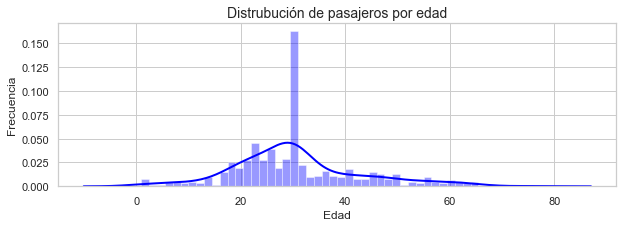

In [83]:

plt.figure(figsize=(10, 3))

sns.distplot(df[(df["Age"] > 0)].Age, kde_kws={"lw": 2}, bins = 50,color='blue')


plt.title('Distrubución de pasajeros por edad',fontsize= 14)
plt.xlabel('Edad')
plt.ylabel('Frecuencia')

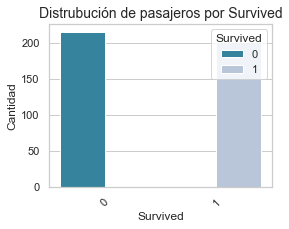

Survived
0      0.0
1    100.0
Name: Survived, dtype: float64


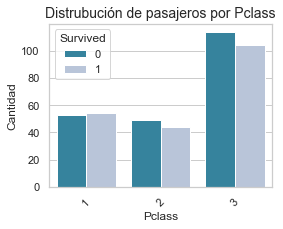

Pclass
1    50.467290
2    47.311828
3    47.706422
Name: Survived, dtype: float64


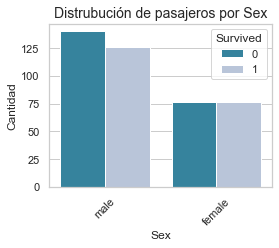

Sex
female    50.000000
male      47.368421
Name: Survived, dtype: float64


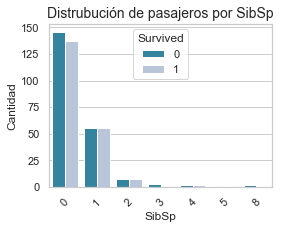

SibSp
0    48.409894
1    50.000000
2    50.000000
3    25.000000
4    50.000000
5     0.000000
8     0.000000
Name: Survived, dtype: float64


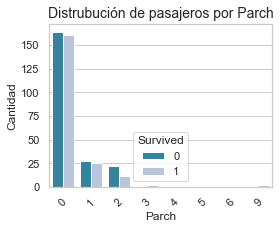

Parch
0     49.382716
1     48.076923
2     33.333333
3     66.666667
4     50.000000
5      0.000000
6    100.000000
9    100.000000
Name: Survived, dtype: float64


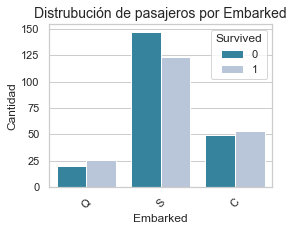

Embarked
C    51.960784
Q    56.521739
S    45.555556
Name: Survived, dtype: float64


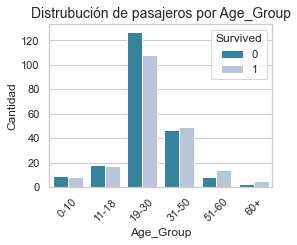

Age_Group
0-10     47.058824
11-18    48.571429
19-30    45.957447
31-50    51.041667
51-60    63.636364
60+      62.500000
Name: Survived, dtype: float64


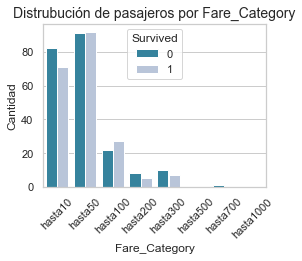

Fare_Category
hasta10      46.405229
hasta50      50.273224
hasta100     55.102041
hasta200     38.461538
hasta300     41.176471
hasta500           NaN
hasta700      0.000000
hasta1000          NaN
Name: Survived, dtype: float64


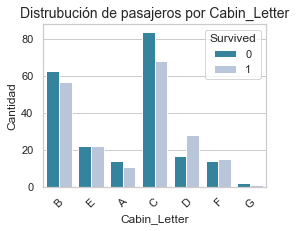

Cabin_Letter
A    44.000000
B    47.500000
C    44.736842
D    62.222222
E    50.000000
F    51.724138
G    33.333333
Name: Survived, dtype: float64


In [84]:
columns_to_plot = ['Survived','Pclass','Sex','SibSp','Parch','Embarked','Age_Group','Fare_Category','Cabin_Letter']

for col in columns_to_plot:
    fig, ax = plt.subplots(figsize=(4,3))
    sns.countplot(x=col, data=df, palette='PuBuGn_r', hue='Survived')
    plt.xticks(rotation=45)
    plt.title(f'Distrubución de pasajeros por {col}',fontsize= 14)
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.show()
    
    vivir = df.groupby(col)['Survived'].mean() * 100
    print(vivir)

#vision general

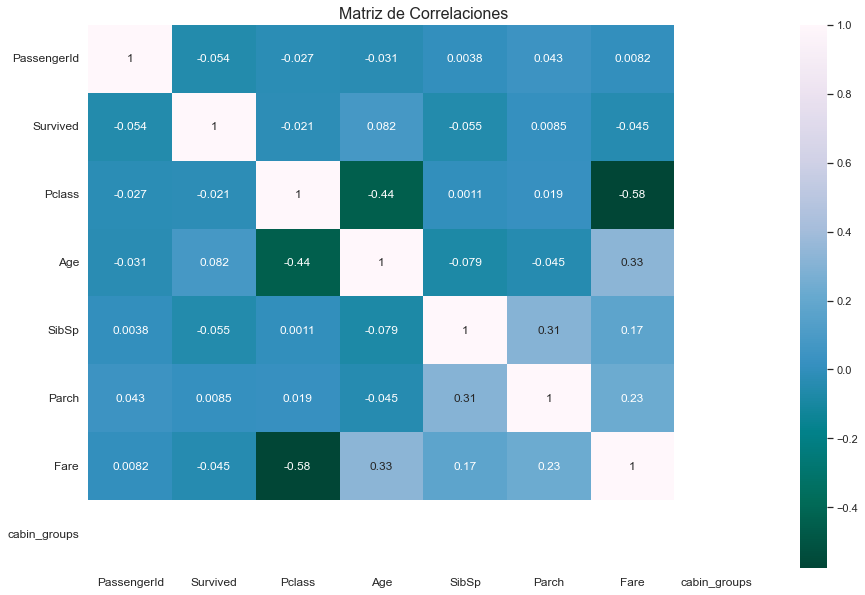

In [85]:
corr_matrix = df.corr()

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 10))

# Crear el mapa de calor de las correlaciones
sns.heatmap(corr_matrix, cmap='PuBuGn_r', annot=True, ax=ax)

# Personalizar el estilo de los ejes
ax.tick_params(axis='x', labelsize=12, labelrotation=0)
ax.tick_params(axis='y', labelsize=12, labelrotation=0)
ax.set_title('Matriz de Correlaciones', fontsize=16)

plt.show()

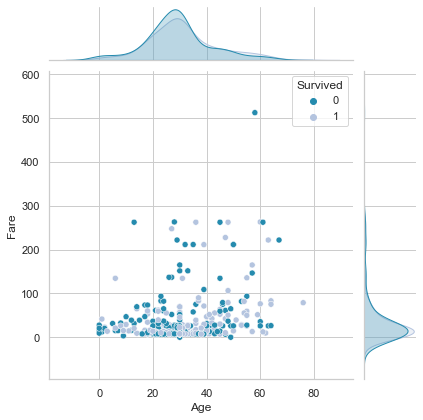

In [86]:
sns.jointplot(x="Age",y="Fare",data=df,cmap='PuBuGn_r',hue="Survived",palette='PuBuGn_r')
plt.show()

Text(0.5, 1.0, 'embarques por edad')

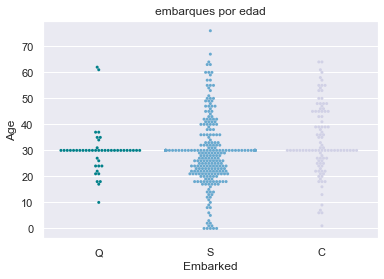

In [87]:
sns.set()
sns.swarmplot(x='Embarked',y='Age',data=df,size=3,palette='PuBuGn_r')
plt.xlabel('Embarked')
plt.ylabel('Age')
plt.margins(0.05)
plt.title('embarques por edad')

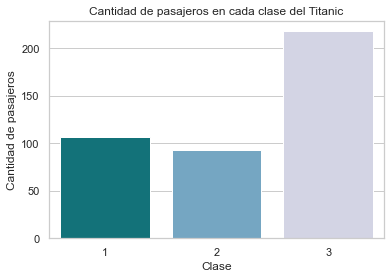

In [88]:
sns.set_style('whitegrid')
sns.countplot(x='Pclass', data=df,palette='PuBuGn_r')

plt.title('Cantidad de pasajeros en cada clase del Titanic')
plt.xlabel('Clase')
plt.ylabel('Cantidad de pasajeros')
plt.show()

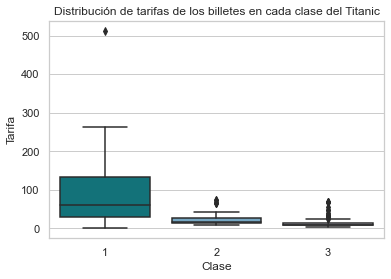

In [89]:
sns.set_style('whitegrid')
sns.boxplot(x='Pclass', y='Fare', data=df,palette='PuBuGn_r')

plt.title('Distribución de tarifas de los billetes en cada clase del Titanic')
plt.xlabel('Clase')
plt.ylabel('Tarifa')
plt.show()

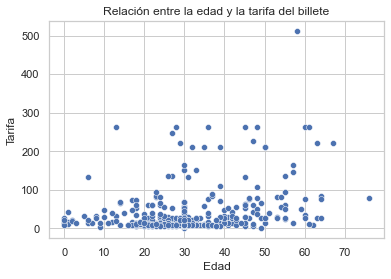

In [90]:
sns.set_style('whitegrid')
sns.scatterplot(x='Age', y='Fare', data=df,palette='PuBuGn_r')

plt.title('Relación entre la edad y la tarifa del billete')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.show()

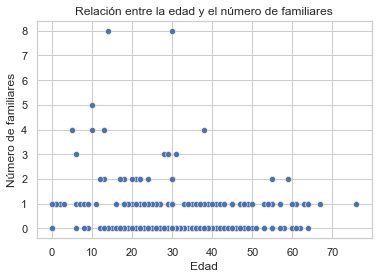

In [91]:
sns.set_style('whitegrid')
sns.scatterplot(x='Age', y='SibSp', data=df,palette='PuBuGn_r')

plt.title('Relación entre la edad y el número de familiares')
plt.xlabel('Edad')
plt.ylabel('Número de familiares')
plt.show()

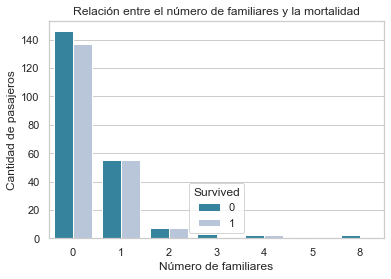

In [92]:
sns.set_style('whitegrid')
sns.countplot(x='SibSp', hue='Survived', data=df,palette='PuBuGn_r')

plt.title('Relación entre el número de familiares y la mortalidad')
plt.xlabel('Número de familiares')
plt.ylabel('Cantidad de pasajeros')
plt.show()

In [93]:
table = pd.crosstab(df['SibSp'], df['Survived'])

# Agregar columna con la suma de cada fila
table['Total'] = table.sum(axis=1)

# Agregar fila con la suma de cada columna
table.loc['Total'] = table.sum()

# Mostrar tabla
print(table)

Survived    0    1  Total
SibSp                    
0         146  137    283
1          55   55    110
2           7    7     14
3           3    1      4
4           2    2      4
5           1    0      1
8           2    0      2
Total     216  202    418


<AxesSubplot:xlabel='Pclass', ylabel='count'>

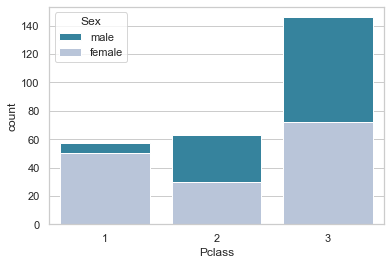

In [94]:
sns.countplot(x='Pclass', hue='Sex', data=df, palette='PuBuGn_r', dodge=False)

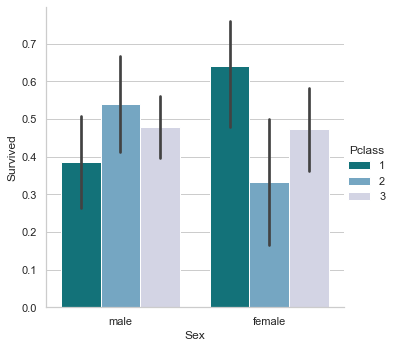

In [95]:

sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="bar", data=df,palette='PuBuGn_r')


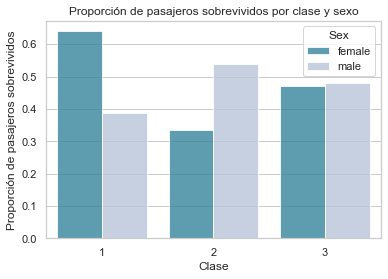

In [96]:
sns.set_style('whitegrid')

# Crear un dataframe con la proporción de pasajeros sobrevividos por clase y sexo
prop_df = df.groupby(['Pclass', 'Sex']).agg({'Survived': 'mean'}).reset_index()

# Cambiar los nombres de las columnas
prop_df.columns = ['Pclass', 'Sex', 'Survival Rate']

# Crear un gráfico de barras apiladas
sns.barplot(x='Pclass', y='Survival Rate', hue='Sex', data=prop_df, palette='PuBuGn_r', alpha=0.8)

# Añadir título y etiquetas de ejes
plt.title('Proporción de pasajeros sobrevividos por clase y sexo')
plt.xlabel('Clase')
plt.ylabel('Proporción de pasajeros sobrevividos')
plt.show()